<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [17]:
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
import urllib.request
urllib.request.urlretrieve("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite","m4_survey_data.sqlite")



('m4_survey_data.sqlite', <http.client.HTTPMessage at 0x15830732fe0>)

Connect to the database.


In [52]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Demo: How to run an sql query


In [6]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""
# QUERY = """
# SELECT COUNT(*)
# FROM sqlite_schema 
# """


# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [8]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [22]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [23]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<Axes: xlabel='ConvertedComp', ylabel='Count'>

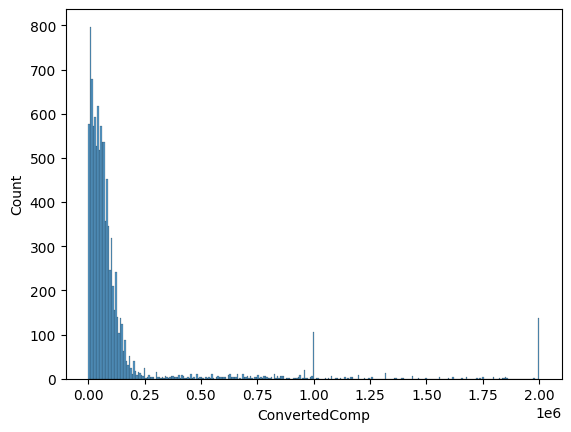

In [11]:
# your code goes here
# print how many rows are there in the table named 'master'
QUERY = """
SELECT *
FROM master
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.drop(columns='index',inplace=True)

sns.histplot(df,x='ConvertedComp')


### Box Plots


Plot a box plot of `Age.`


<Axes: xlabel='Age'>

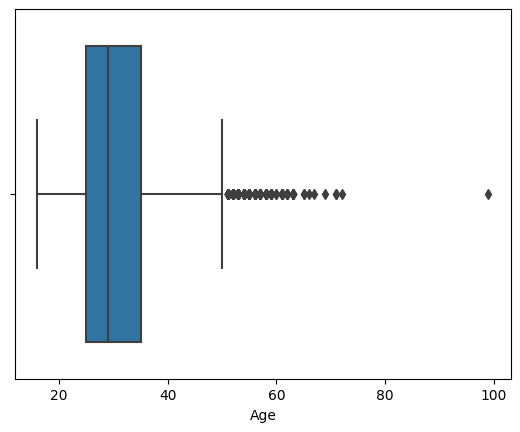

In [32]:
# your code goes here

sns.boxplot(df,x='Age')

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<Axes: xlabel='Age', ylabel='WorkWeekHrs'>

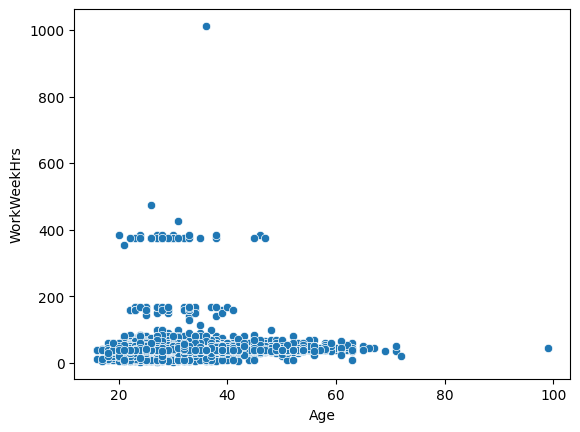

In [51]:
# your code goes here

sns.scatterplot(df,x='Age',y='WorkWeekHrs')


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<Axes: xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

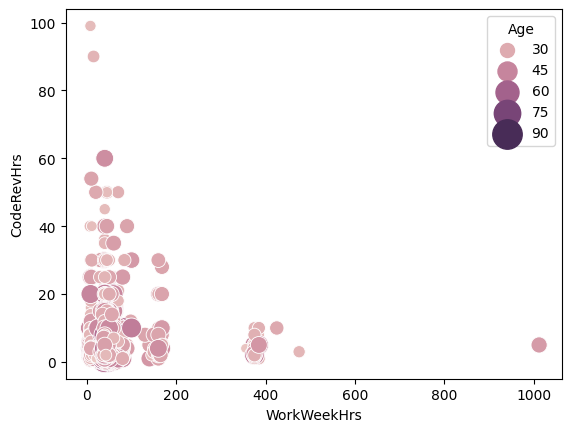

In [52]:
# your code goes here


sns.scatterplot(df,x='WorkWeekHrs',y='CodeRevHrs',size='Age',sizes=(20,500),hue = 'Age')

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


<Axes: ylabel='Respondent_Count'>

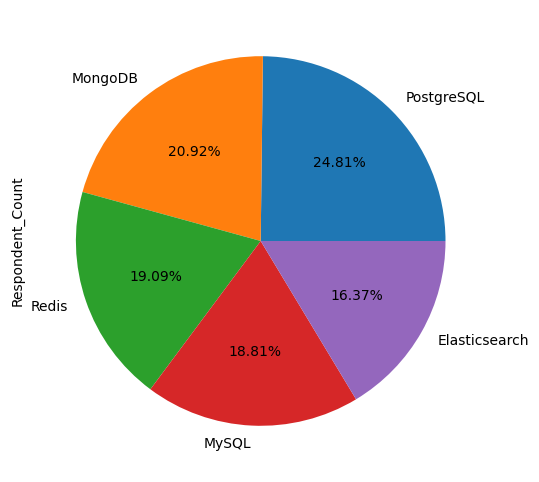

In [65]:
# your code goes here LanguageDesireNextYear

# your code goes here
# print how many rows are there in the table named 'master'
QUERY = """
SELECT DatabaseDesireNextYear,COUNT(Respondent) AS Respondent_Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Respondent_Count DESC
LIMIT 5
"""
df1 = pd.read_sql_query(QUERY,conn)
df1.set_index('DatabaseDesireNextYear',inplace=True)


df1.plot(kind='pie', y='Respondent_Count',legend=False,autopct = '%1.2f%%',figsize=(6,6))

# the read_sql_query runs the sql query and returns the data as a dataframe

#df.drop(columns='index',inplace=True)
#df1['DatabaseDesireNextYear'].value_counts()
# df1['DatabaseDesireNextYear'].astype(str)
# top5 = df1['DatabaseDesireNextYear'].value_counts().sort_values(ascending=False).head()
# top5d = list(dict(top5).keys())
# top5

# df_top5d = df1[df1['DatabaseDesireNextYear'].isin(values=top5d)]
# df_top5d.shape
# QUERY = """
# SELECT LanguageDesireNextYear,COUNT(Respondent) AS Respondent_Count
# FROM LanguageDesireNextYear
# GROUP BY LanguageDesireNextYear
# ORDER BY Respondent_Count DESC
# LIMIT 5
# """
# df1 = pd.read_sql_query(QUERY,conn)
# df1.head()

# QUERY = """
# SELECT DatabaseWorkedWith,COUNT(Respondent) AS Respondent_Count
# FROM DatabaseWorkedWith
# GROUP BY DatabaseWorkedWith
# ORDER BY Respondent_Count DESC
# """
# df1 = pd.read_sql_query(QUERY,conn)
# df1.head()

# QUERY = """
# SELECT DevType,COUNT(Respondent) AS Respondent_Count
# FROM DevType
# GROUP BY DevType
# ORDER BY Respondent_Count DESC
# """
# df1 = pd.read_sql_query(QUERY,conn)
# df1



### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<Axes: xlabel='Age'>

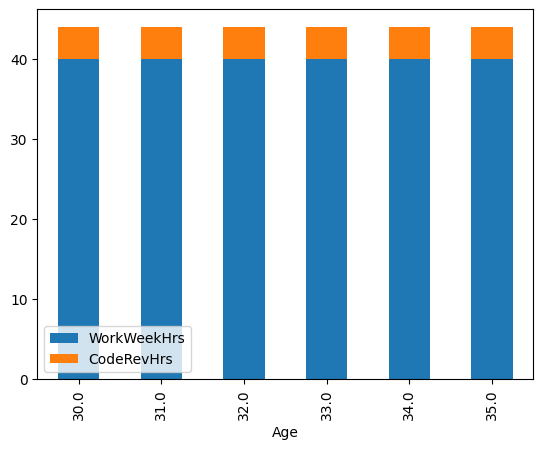

In [23]:
# your code goes here

df_a = df[(df['Age'] >= 30) & (df['Age'] <= 35)]
df_s = pd.DataFrame(df_a.groupby('Age').median('CodeRevHrs'))
df_s.reset_index(inplace=True)
df_s.drop(columns=['Respondent','CompTotal','ConvertedComp'],inplace=True)
df_s.head()
df_s.plot(x='Age',stacked=True,kind='bar')
# plt.bar(df_s['Age'], df_s['WorkWeekHrs'], color ='r')
# plt.bar(df_s['Age'], df_s['CodeRevHrs'], bottom=df_s['WorkWeekHrs'], color ='b')
# plt.legend(df_s['CodeRevHrs'] = 'CodeRevHrs',df_s['WorkWeekHrs'] : 'WorkWeekHrs')

# sns.barplot(df_s,   
#             x='Age',     
#             y='CodeRevHrs',
#             color= 'darkblue'         
#             )
# sns.barplot(df_s,   
#             x='Age',     
#             y='WorkWeekHrs',
#             color= 'lightblue',
#             estimator=sum()     
#             )


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<Axes: xlabel='Age', ylabel='ConvertedComp'>

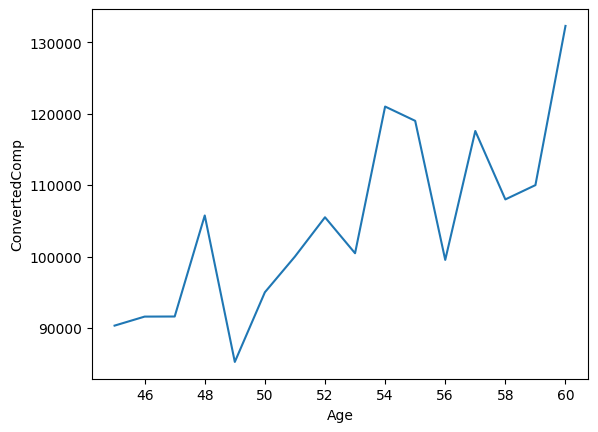

In [27]:
# your code goes here
df_aa = df[(df['Age'] >= 45) & (df['Age'] <= 60)]
df_c = pd.DataFrame(df_aa.groupby('Age').median('CodeRevHrs'))
df_c.reset_index(inplace=True)

sns.lineplot(df_c,x='Age',y='ConvertedComp')


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<Axes: xlabel='Respondent', ylabel='MainBranch'>

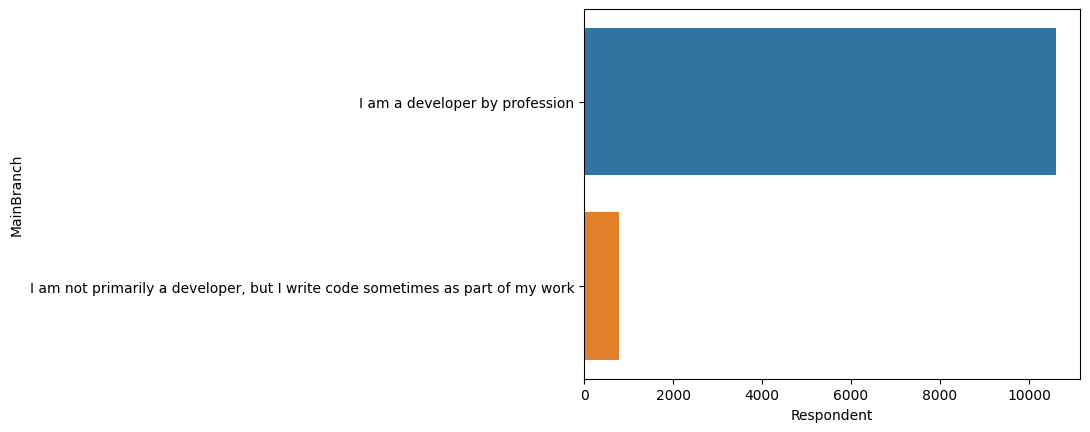

In [44]:
# your code goes here
# sns.barplot(df,y='MainBranch',orient='h')

df_h = pd.DataFrame(df.groupby('MainBranch').count())
df_h.reset_index(inplace=True)
sns.barplot(df_h,x='Respondent',y='MainBranch',orient='h')



Close the database connection.


In [45]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
